In [1]:
import pydicom
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

%matplotlib inline

if os.getcwd().split('/')[-1] == "notebooks":
    %cd ..

from scripts.utils import read_dcm

/Users/jc/code/ich-detection


/Users/jc/.venvs/bme548/lib/python3.11/site-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


Image shape:  (256, 256)


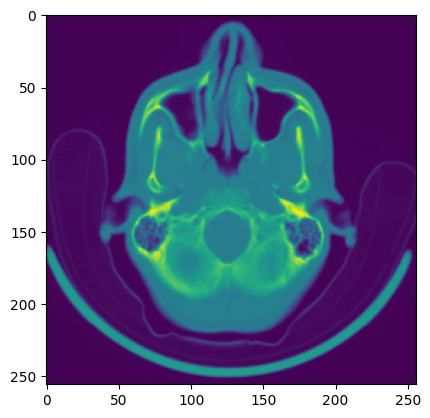

In [2]:
img_path = 'data/RSNA_BME548/images/ID_00a0b0e52.dcm'
image = read_dcm(img_path)

print("Image shape: ", image.shape)

# show original image
plt.imshow(image)  

## Apply radon transform to generate Sinogram

/Users/jc/.venvs/bme548/lib/python3.11/site-packages/skimage/transform/radon_transform.py:75: UserWarning: Radon transform: image must be zero outside the reconstruction circle
  warn('Radon transform: image must be zero outside the '


Text(0.5, 1.0, 'Radon transform\n(Sinogram)')

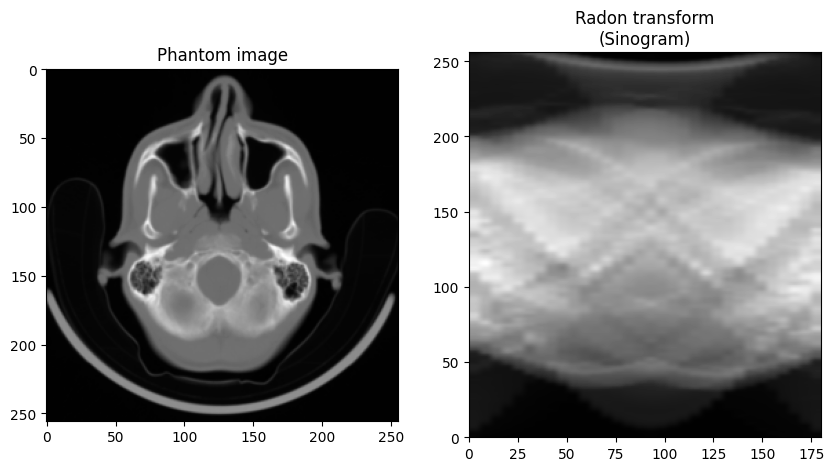

In [3]:
from skimage.transform import radon

subsample = 8
theta = np.linspace(0., 180., max(image.shape)//subsample, endpoint=False)
sinogram = radon(image, theta=theta)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Phantom image')

plt.subplot(1, 2, 2)
plt.imshow(sinogram, cmap='gray',
           extent=(0, 180, 0, sinogram.shape[0]), aspect='auto')
plt.title('Radon transform\n(Sinogram)')


## Apply noise to the Sinogram

Text(0.5, 1.0, 'Noisy Sinogram')

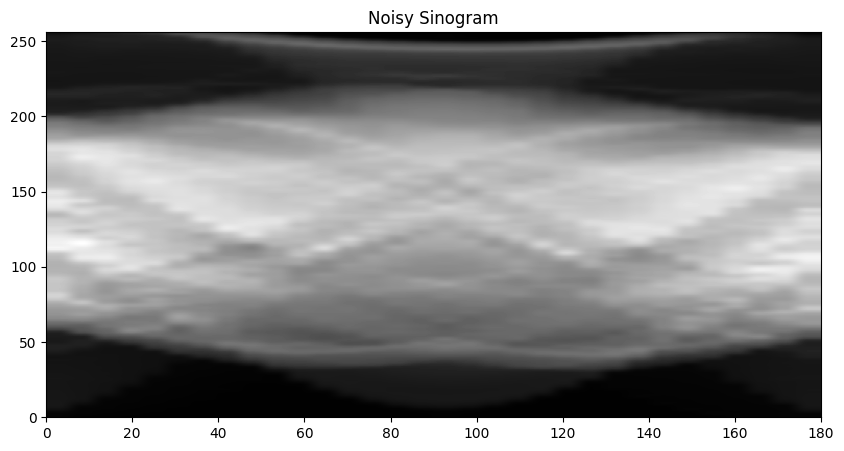

In [4]:
# Import noise simulator
from scripts.noise_simulation import NoiseConfiguration, NoiseSimulator, NoiseType

# noise_types, noise_levels, train_noise_ratio, val_noise_ratio, test_noise_ratio
simulation_config = NoiseConfiguration([NoiseType.POISSON], [])
noisy_sinogram = NoiseSimulator.apply_noise(sinogram, simulation_config)

# show noisy sinogram
plt.figure(figsize=(10, 5))
plt.imshow(noisy_sinogram, cmap='gray',
           extent=(0, 180, 0, noisy_sinogram.shape[0]), aspect='auto')
plt.title('Noisy Sinogram')

## Reconstruct sinogram using filtered back projection

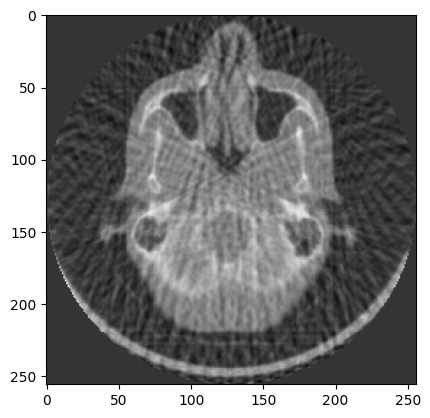

In [5]:
from skimage.transform import iradon

reconstructed_img = iradon(noisy_sinogram, theta=theta, filter_name='ramp')
plt.imshow(reconstructed_img, cmap='gray')
